In [37]:
import uproot
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
rootfile_path = "ROOT/17/"
rootfile_filepath = rootfile_path+os.listdir(rootfile_path)[0]
rootfile = uproot.open(rootfile_filepath)

In [39]:
sqrt_s = 14000 

In [40]:
events = rootfile["LHEF"]

In [41]:
branchlist = [
 'Particle.PID',
 'Particle.Px',
 'Particle.Py',
 'Particle.Pz',
 'Particle.E',
 'Particle.M',
 'Particle.PT',
 'Particle.Eta',
 'Particle.Phi',
 'Particle.Rapidity']
events_df = events.pandas.df(branchlist,flatten=True)
events_df.head()

Particle.PID  Particle.Px  Particle.Py  Particle.Pz  \
entry subentry                                                        
0     0                 2212     0.566003     0.004495  6518.521900   
      1                 2212    -0.106344     0.407668 -6220.121100   
      2                    6   -22.362287  -154.840540   -18.759520   
      3                   -6    22.182669   154.682300   -93.087673   
1     0                 2212     0.102940    -0.249918  6787.584800   

                Particle.E  Particle.M  Particle.PT  Particle.Eta  \
entry subentry                                                      
0     0         6518.52190     0.93827     0.566021     10.044674   
      1         6220.12110     0.93827     0.421310    -10.293078   
      2          234.96399   174.30000   156.447003     -0.119624   
      3          251.92160   174.30000   156.264790     -0.565138   
1     0         6787.58480     0.93827     0.270288     10.824265   

                Particle.Phi  Particle.Rapidity  
entry subentry                                   
0     0             0.007942                inf  
      1             1.825968               -inf  
      2            -1.714226          -0.080010  
      3             1.428360          -0.387856  
1     0            -1.180079                inf

In [42]:
nParticles = []
for entry,entry_df in events_df.groupby(level=0):
    nParticles.append(len(entry_df))
    PIDs = entry_df[["Particle.PID"]].to_numpy()
    if not all(elem in PIDs for elem in [6,-6,2212]):
        print(PIDs)
        events_df = events_df.drop(entry)
        print("Dropping entry: "+str(entry))

[[2212]
 [2212]
 [   1]
 [  -1]]
Dropping entry: 1557


In [43]:
tops = events_df[ events_df["Particle.PID"] == 6]
atops = events_df[ events_df["Particle.PID"] == -6]

In [44]:
tops_lorentzVector = tops[["Particle.Px","Particle.Py","Particle.Pz","Particle.E"]].to_numpy()
atops_lorentzVector = atops[["Particle.Px","Particle.Py","Particle.Pz","Particle.E"]].to_numpy()


In [45]:
ttbars_lorentzVector = tops_lorentzVector + atops_lorentzVector

In [46]:
ttbars_masses = np.sqrt( ttbars_lorentzVector[:,3]**2 - (ttbars_lorentzVector[:,0]**2 + ttbars_lorentzVector[:,1]**2 + ttbars_lorentzVector[:,2]**2) )

## Plot number of particles

Text(0.5, 0, 'Number of Particles')

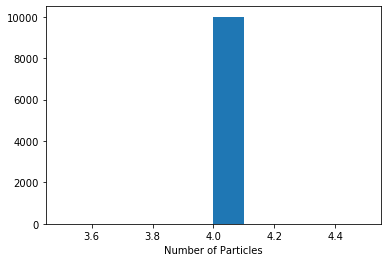

In [47]:
fig, ax = plt.subplots()
h_mtt =ax.hist(nParticles, bins=10)
plt.xlabel('Number of Particles')

## Plot m_tt

Text(0.5, 0, 'm_tt (GeV)')

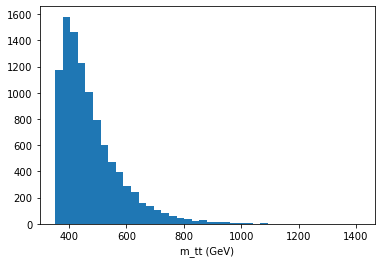

In [48]:
fig, ax = plt.subplots()
h_mtt =ax.hist(ttbars_masses, bins=40)
plt.xlabel('m_tt (GeV)')

In [49]:
protonP = events_df[ (events_df["Particle.PID"] == 2212) & (events_df["Particle.Pz"] > 0) ]
protonN = events_df[ (events_df["Particle.PID"] == 2212) & (events_df["Particle.Pz"] < 0) ]

In [50]:
protonP_xi = (1 - protonP[["Particle.Pz"]].to_numpy()/(sqrt_s/2))[:,0]
protonN_xi = (1 + protonN[["Particle.Pz"]].to_numpy()/(sqrt_s/2))[:,0]

In [51]:
m_total = np.sqrt((sqrt_s**2) * protonP_xi * protonN_xi)

## Plot m_total

Text(0.5, 0, 'm_total (GeV)')

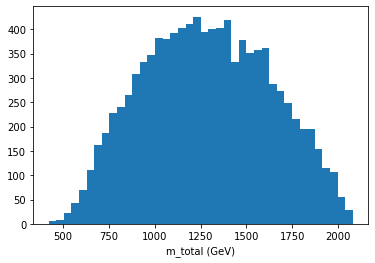

In [52]:
fig, ax = plt.subplots()
h_m_total =ax.hist(m_total, bins=40)
plt.xlabel('m_total (GeV)')

In [53]:
m_frac = ttbars_masses / m_total

## Plot m_frac (a.k.a. sqrt(beta_1*beta_2)

Text(0.5, 0, 'm_frac')

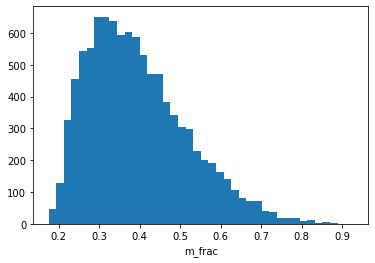

In [54]:
fig, ax = plt.subplots()
h_m_frac =ax.hist(m_frac, bins=40)
plt.xlabel('m_frac')